In [1]:
#setting up fastai
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
#downloading the custom dataset in colab
! git clone https://github.com/Priyansi/minionsDataset.git

In [0]:
#setting path for colab
PATH = '/content/minionsDataset'

In [0]:
np.random.seed(24) #dataset splits randomly
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(PATH, valid_pct=0.2, ds_tfms=tfms, size=299, bs=16).normalize(imagenet_stats) 

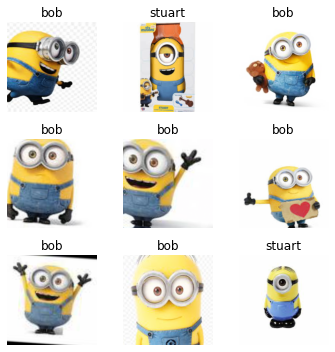

In [13]:
data.show_batch(rows=3, figsize=(5, 5))

In [0]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.594133,1.158837,0.677419,00:04
1,0.946772,1.323066,0.612903,00:04
2,0.669477,1.397895,0.709677,00:04
3,0.553950,1.431888,0.741935,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


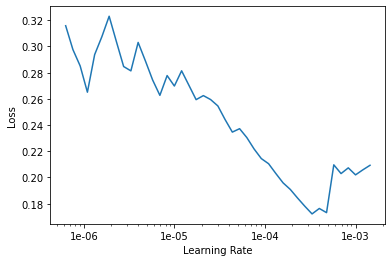

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.096089,0.536086,0.870968,00:06
1,0.099189,0.525740,0.870968,00:06
2,0.082151,0.428157,0.903226,00:06
3,0.076874,0.399453,0.903226,00:06


In [0]:
learn.save('stage-1')

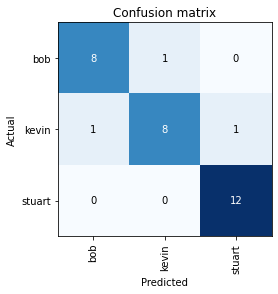

In [26]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

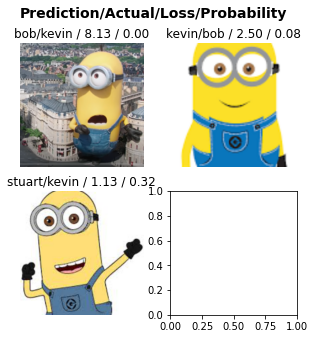

In [27]:
interpret.plot_top_losses(3, figsize=(5,5))

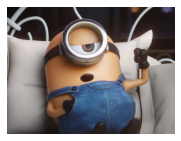

In [26]:
IMAGEPATH='/content/Screenshot (143).png'
image = open_image(IMAGEPATH)
image.show()

In [28]:
learn.predict(image)

(Category stuart, tensor(2), tensor([4.0089e-04, 1.0803e-06, 9.9960e-01]))